In [1]:
import sys
import pandas as pd
import numpy as np

In [2]:
input_file = 'data/healthy.csv'
output_file = 'data/linear_data.csv'

In [3]:
df = pd.read_csv(input_file, encoding='CP949')

In [6]:
df = df.loc[:,['신장(5Cm단위)','체중(5Kg 단위)']]
df.to_csv(output_file, index=False, encoding='utf-8-sig')
df.head(5)

,신장(5Cm단위),체중(5Kg 단위)
0,165,65
1,155,45
2,160,70
3,170,60
4,170,70


In [7]:
height = df.iloc[:,[0]]
weight = df.iloc[:,[1]]

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [11]:
train_input, test_input, train_target, test_target = train_test_split(
    height, weight, random_state=42)
train_input = train_input.values.reshape(-1,1)
test_input = test_input.values.reshape(-1,1)
print(train_input)

        신장(5Cm단위)
570606        165
756283        165
738227        175
554038        170
712266        160
...           ...
259178        175
365838        155
131932        165
671155        160
121958        170

[750000 rows x 1 columns]
[[165]
 [165]
 [175]
 ...
 [165]
 [160]
 [170]]


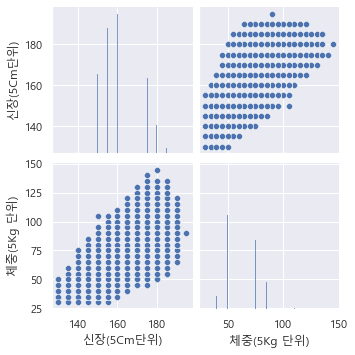

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']
['sans-serif']
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname = 'C:/Windows/Fonts/malgun.ttf').get_name()
matplotlib.rc('font', family = font_name)
matplotlib.rcParams['axes.unicode_minus'] = False
sns.pairplot(df, diag_kind='hist')
plt.show()

In [21]:
lr = LinearRegression()
lr.fit(train_input, train_target)

LinearRegression()

In [22]:
print(lr.coef_,lr.intercept_)

[[0.92843352]] [-87.12733632]


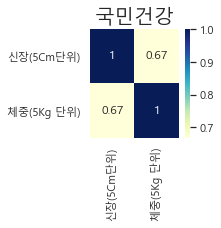

In [46]:
correlation = df.corr()
plt.figure(figsize=(2,2))
sns.heatmap(correlation, annot=True,cmap='YlGnBu')
plt.title('국민건강',fontsize=20)
plt.show()

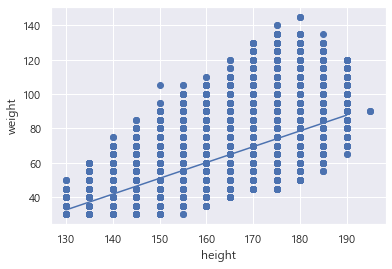

In [41]:
#sns.regplot(x=train_input, y=train_target,fit_reg=True)
plt.scatter(train_input, train_target)
plt.plot([130,190], [130*0.92-87,190*0.92-87])
plt.xlabel('height')
plt.ylabel('weight')
plt.show()

In [24]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.44718326276322184
0.44638103774140825
